### Introduction
Regression analysis is a supervised machine learning process for estimating the relationships among different features in data, then making further predictions on numerical data based on these relationships.<br>

Regression analysis is often used in finance and investing industry. For example, predicting house perice, stock market etc.

### Regression algorithms
Common regression algos:<br>
- Linear Regression<br>
- Decision Tree<br>
- Support Vector Regression<br>
- Lasso Regression<br>
- Random Forest<br>

#### Linear Regression
Linear regression performs the task to predict a dependent variable (target) based on the given independent variable(s). This regression technique aims at finding out a linear relationship between a dependent and independent varable(s)<br>
![Alt text](image-7.png)

![Alt text](image-9.png)

*Advantages of LR*<br>
- Linear regression is simple to implement.<br><br>

*Disdvantages of LR*<br>
- Greatly affected by outliers.
- Oversimplifies real-world problems by assuming a linear relationship among variables, hence not recommended for practical use cases

**Evaluation metrics from LR**<br>
- Coefficient of Determination (R^2)<br>
- Root Mean Squared Error (RMSE)

## Linear Regression Example 1: Car Prediction Model
Goal: Predict the car price by building a LR model. Dataset is available on Kaggle :https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho


In [164]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
#Importing dataset
url = 'https://raw.githubusercontent.com/5minslearn/Car-Price-Prediction-using-Linear-Regression/master/car%20data.csv'
df = pd.read_csv(url)

In [133]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [135]:
# General data descrition
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


There are no null values

In [136]:
# Dropping categorical features
df.drop(columns =['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], inplace = True)

In [137]:
data = df.copy()

In [138]:
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


<Axes: >

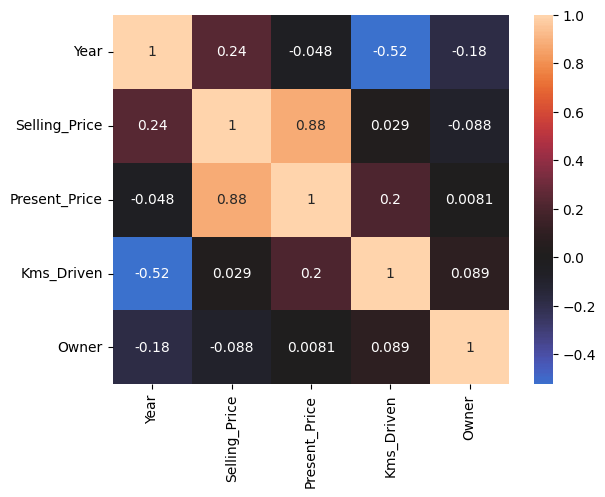

In [139]:
# Correlation Heatmap
sns.heatmap(data.corr(),center=0,annot=True)

### Building The Model
Determine the features and target columns. From our dataset, the selling price is the target.

In [140]:
#Target
y =data['Selling_Price']

# Features
X = data.drop(['Selling_Price'], axis =1)

In [142]:
#Shape of X and y
X.shape, y.shape

((301, 4), (301,))

#### Splitting the dataset

In [145]:
#Importing libraries
import sklearn
from sklearn.model_selection import train_test_split

#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 42)

#### Fit Model

In [146]:
#Importing libraries
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

#Fit model
LR.fit(X_train,y_train)

LinearRegression()

#### Prediction on test data

In [149]:
y_predicted =LR.predict(X_test)

#### Model Evaluation

In [150]:
#Using MSE

#Importing necessary libraries
from sklearn.metrics import mean_squared_error
MSE =mean_squared_error(y_test, y_predicted)

#Output
print(f'Mean Squared Error: {MSE}')

Mean Squared Error: 4.122560047937092


In [159]:
#Alternatively... Using a user defined function to combine several evaluation metrics..
from sklearn import metrics
def LR_eval(model,X_test,y_test,model_name):
    
    y_predicted = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_predicted)
    MSE = metrics.mean_squared_error(y_test,y_predicted)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test,y_predicted)
    
    return pd.DataFrame([MAE,MSE,RMSE,R2_Score],
                        index = ['MAE','MSE','RMSE','R2_Score'],
                        columns =[model_name])

LR_eval(LR,X_test,y_test,'Linear Regression')

,Linear Regression
MAE,1.393967
MSE,4.122560
RMSE,2.030409
R2_Score,0.821035


#### New predictions

In [155]:
new_data = pd.DataFrame({'Year': [2017] ,
                    'Present_Price':[8.5],
                    'Kms_Driven':[580],
                    'Owner':[0]})

new_pred = LR.predict(new_data)

print('\n Predictions on new data:')
print(new_pred)


 Predictions on new data:
[6.64562455]


#### Results Visualization

In [161]:
#cReating a dataframe with the actual and predicted values
y_predicted = LR.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test,
                              'Predicted':y_predicted}
                             )

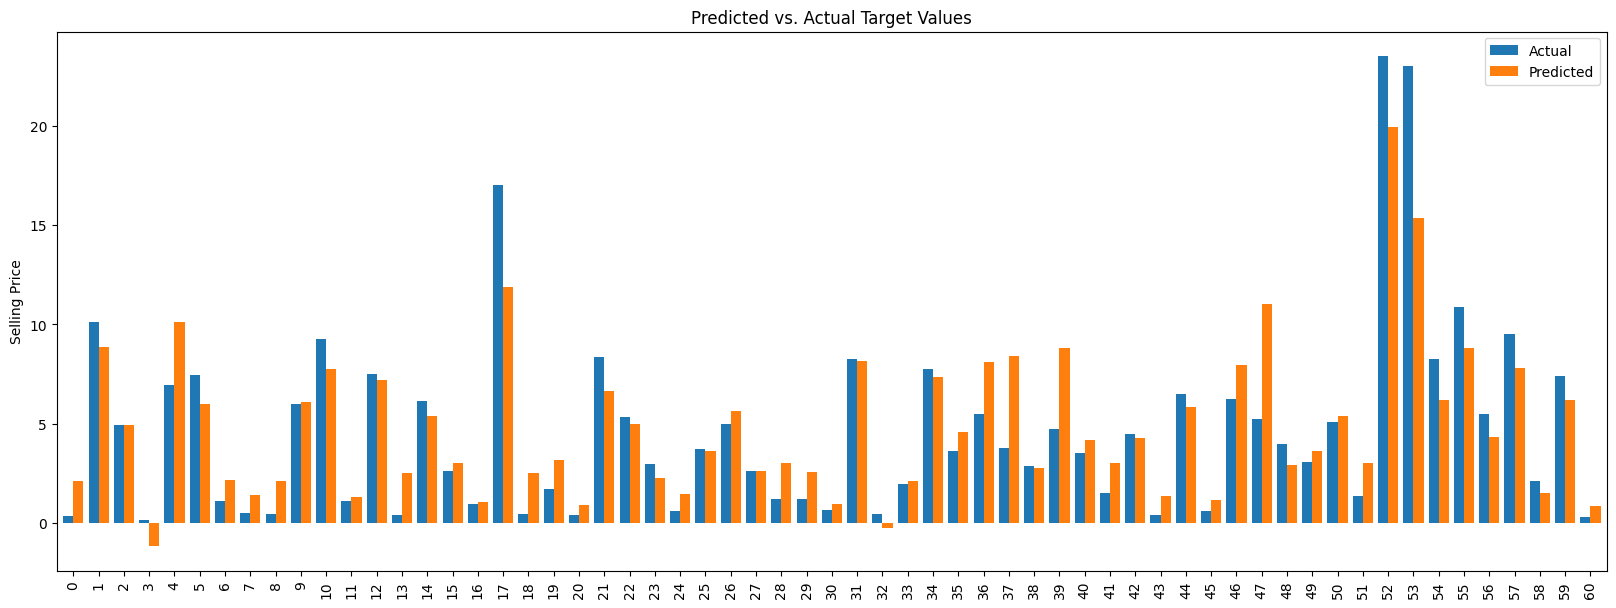

In [165]:
# Visualization by bar plot
def comparison(comparison_df):
    comparison_df.reset_index(inplace = True) #resets the index to default integrer index (0,1,2)
    comparison_df.plot(y =['Actual', 'Predicted'], kind = 'bar', figsize = (20,7), width =0.8)
    
    
    plt.title ('Predicted vs. Actual Target Values')
    plt.ylabel('Selling Price')
    plt.show()
comparison(comparison_df)